In [9]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.model_selection import GridSearchCV, learning_curve, cross_val_predict,cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve

In [2]:
poly=pd.read_csv('poly_new.csv')
y=poly['target']
train=poly.drop('target',axis=1)
std_=StandardScaler()
train_data=std_.fit_transform(train)
train.head()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,1,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,...,DebtRatio^3,DebtRatio^2 MonthlyIncome,DebtRatio^2 age,DebtRatio MonthlyIncome^2,DebtRatio MonthlyIncome age,DebtRatio age^2,MonthlyIncome^3,MonthlyIncome^2 age,MonthlyIncome age^2,age^3
0,2.0,13.0,0.0,6.0,0.0,2.0,1.0,0.766127,0.802982,9120.000000,...,0.517747,5880.396331,29.015113,6.678756e+07,329543.865742,1626.038811,7.585505e+11,3.742848e+09,1.846800e+07,91125.0
1,0.0,4.0,0.0,0.0,0.0,1.0,1.0,0.957151,0.121876,2600.000000,...,0.001810,38.619902,0.594152,8.238831e+05,12675.124904,195.001922,1.757600e+10,2.704000e+08,4.160000e+06,64000.0
2,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.658180,0.085113,3042.000000,...,0.000617,22.037120,0.275283,7.876191e+05,9838.765697,122.903713,2.814995e+10,3.516430e+08,4.392648e+06,54872.0
3,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.233810,0.036050,3300.000000,...,0.000047,4.288613,0.038987,3.925810e+05,3568.918518,32.444714,3.593700e+10,3.267000e+08,2.970000e+06,27000.0
4,1.0,7.0,0.0,1.0,0.0,0.0,1.0,0.907239,0.024926,6107.322992,...,0.000015,3.794420,0.030443,9.297133e+05,7459.234238,59.846594,2.277994e+11,1.827670e+09,1.466368e+07,117649.0


In [5]:
clf=DecisionTreeClassifier(random_state=42)
cv=cross_validate(clf,train_data,y,scoring='roc_auc',cv=5,n_jobs=-1)

In [7]:
np.mean(cv['test_score'])

0.6084312349951346

In [8]:
np.std(cv['test_score'])

0.006489294413848277

In [26]:
clf=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                         n_estimators=3,n_jobs=-1,
                         random_state=42)
cv=cross_validate(clf,train_data,y,scoring='roc_auc',cv=5,n_jobs=-1)
print(cv['test_score'])

[0.70377227 0.70637712 0.69854595 0.70259706 0.71176619]


In [38]:
train_new=train_data[:20000,:]
y_new=y[:20000]

In [39]:
scoring=[]
std_scoring=[]
for num in range(1,30):
    clf=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                         n_estimators=num,n_jobs=-1,
                         random_state=42)
    cv=cross_validate(clf,train_new,y_new,scoring='roc_auc',cv=5,n_jobs=-1)
    scoring.append(np.mean(cv['test_score']))
    std_scoring.append(np.std(cv['test_score']))

In [40]:
scoring

[0.5979397205325805,
 0.649575967020534,
 0.6849501735559881,
 0.7100052529927404,
 0.7228426208939239,
 0.7324955037020084,
 0.7446319107977344,
 0.7562297671325323,
 0.7598531747159901,
 0.7664344983555859,
 0.7698597657075922,
 0.7766639201973989,
 0.7788191091073062,
 0.7828299219080087,
 0.78561197773,
 0.7892021258524113,
 0.7892225181514764,
 0.7909479779931068,
 0.7932488674882062,
 0.7943518972745801,
 0.7950182212822976,
 0.7972577209053873,
 0.7988507724376401,
 0.8005302630546414,
 0.8026582477253396,
 0.8042821383537522,
 0.805372033180714,
 0.8062878163296439,
 0.806288663507295]

In [41]:
std_scoring

[0.01567931531834074,
 0.01666910617806944,
 0.015647157412185697,
 0.017527175701901838,
 0.018848519673399764,
 0.020951289874808314,
 0.02006567731674829,
 0.023990695383738454,
 0.02450260969986799,
 0.024144097770929684,
 0.02485092421954581,
 0.02406667442944662,
 0.0245177567225202,
 0.02364845073996106,
 0.023390123403647663,
 0.02356790655204209,
 0.022633118557155236,
 0.022809642902502755,
 0.022009915206129917,
 0.022014319632174255,
 0.02227663445157154,
 0.021635401912787455,
 0.021477741282742845,
 0.020386203688784,
 0.018324316026160904,
 0.018028577627654446,
 0.01684833450797826,
 0.017326454437669166,
 0.017811548064161076]

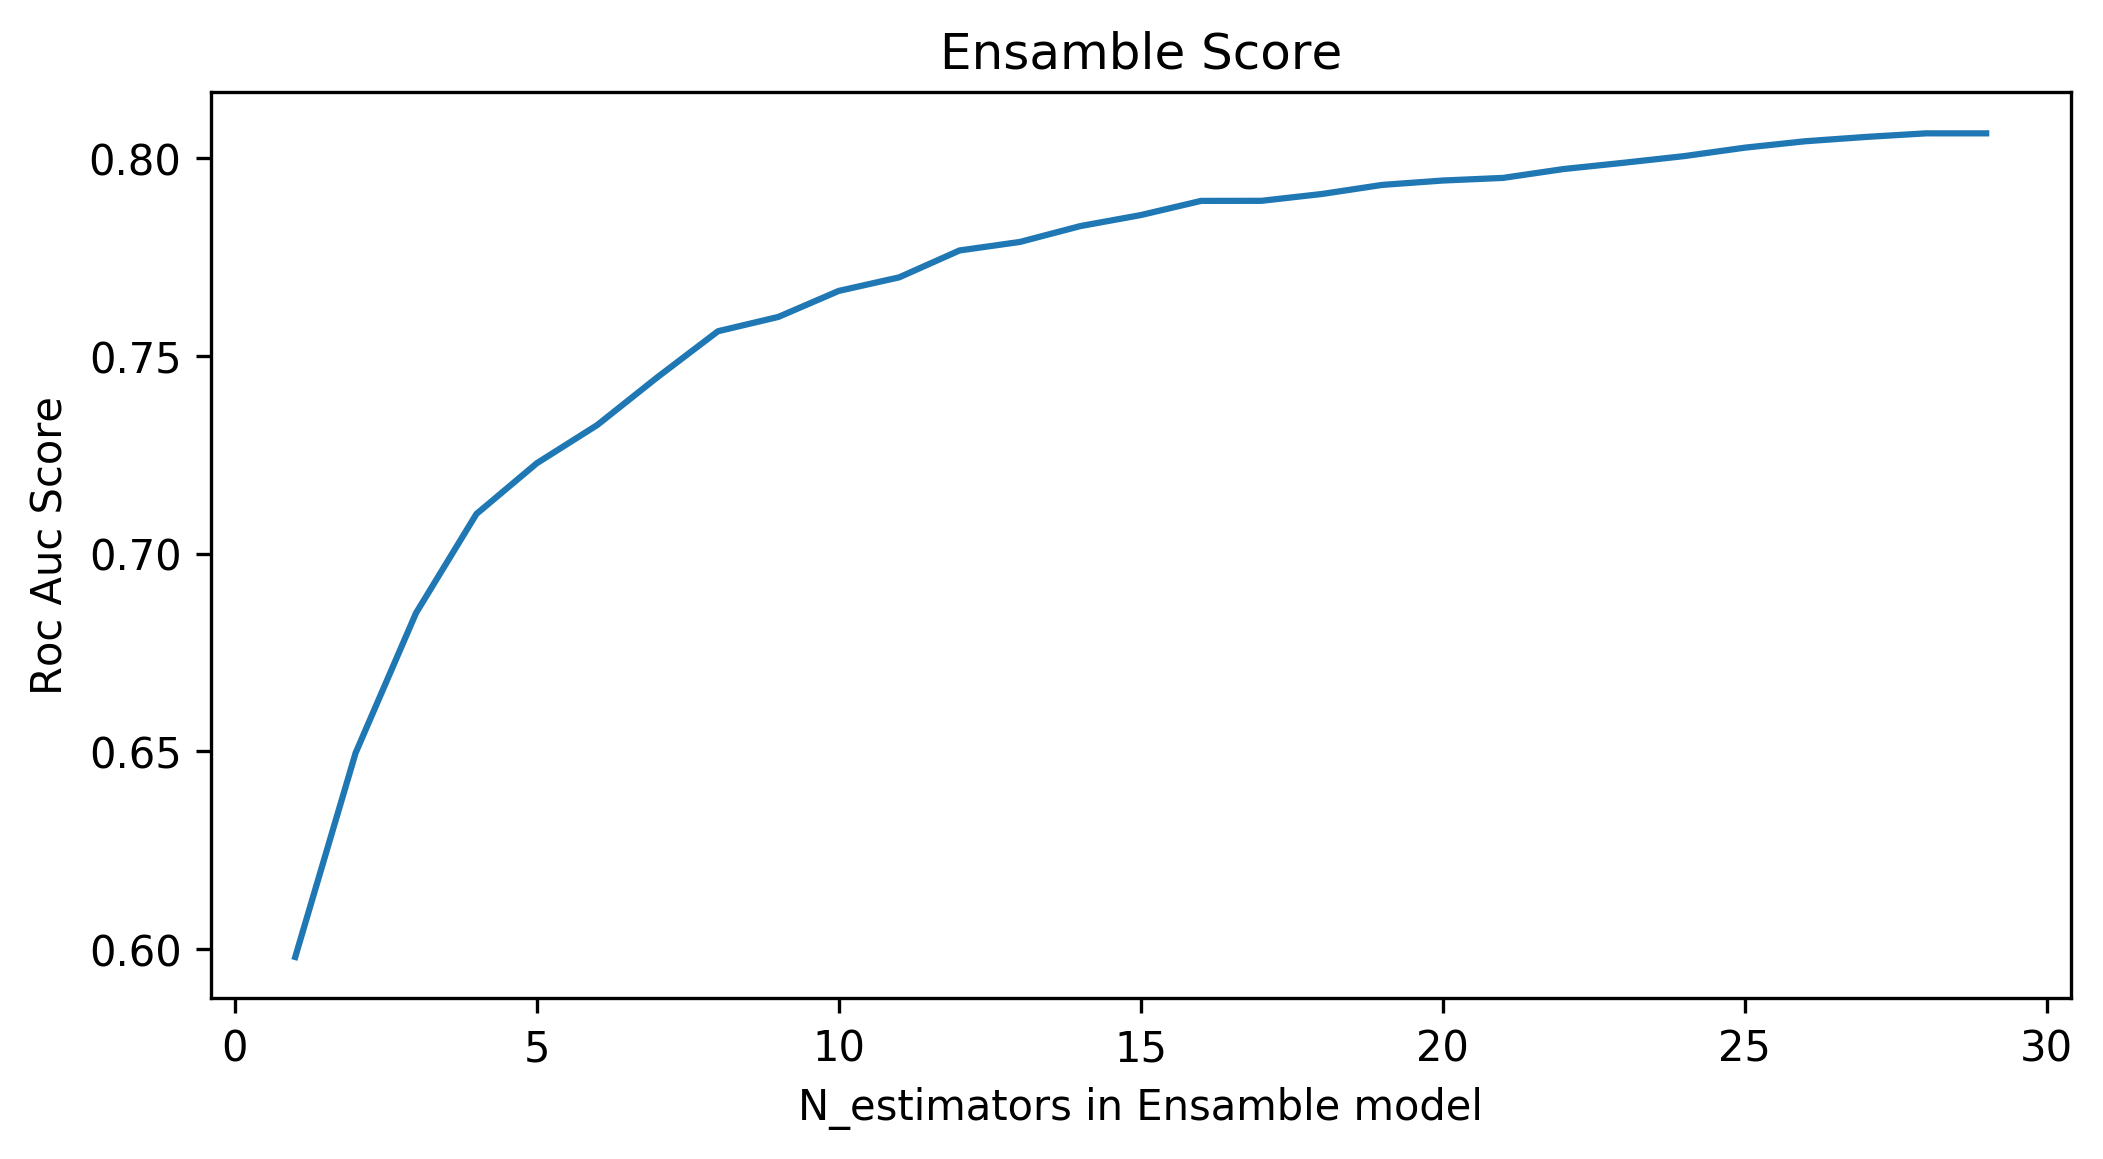

In [43]:
plt.figure(figsize=(8,4),dpi=300)
plt.plot(range(1,30),scoring)
plt.xlabel('N_estimators in Ensamble model')
plt.ylabel('Roc Auc Score')
plt.title('Ensamble Score')
plt.show()

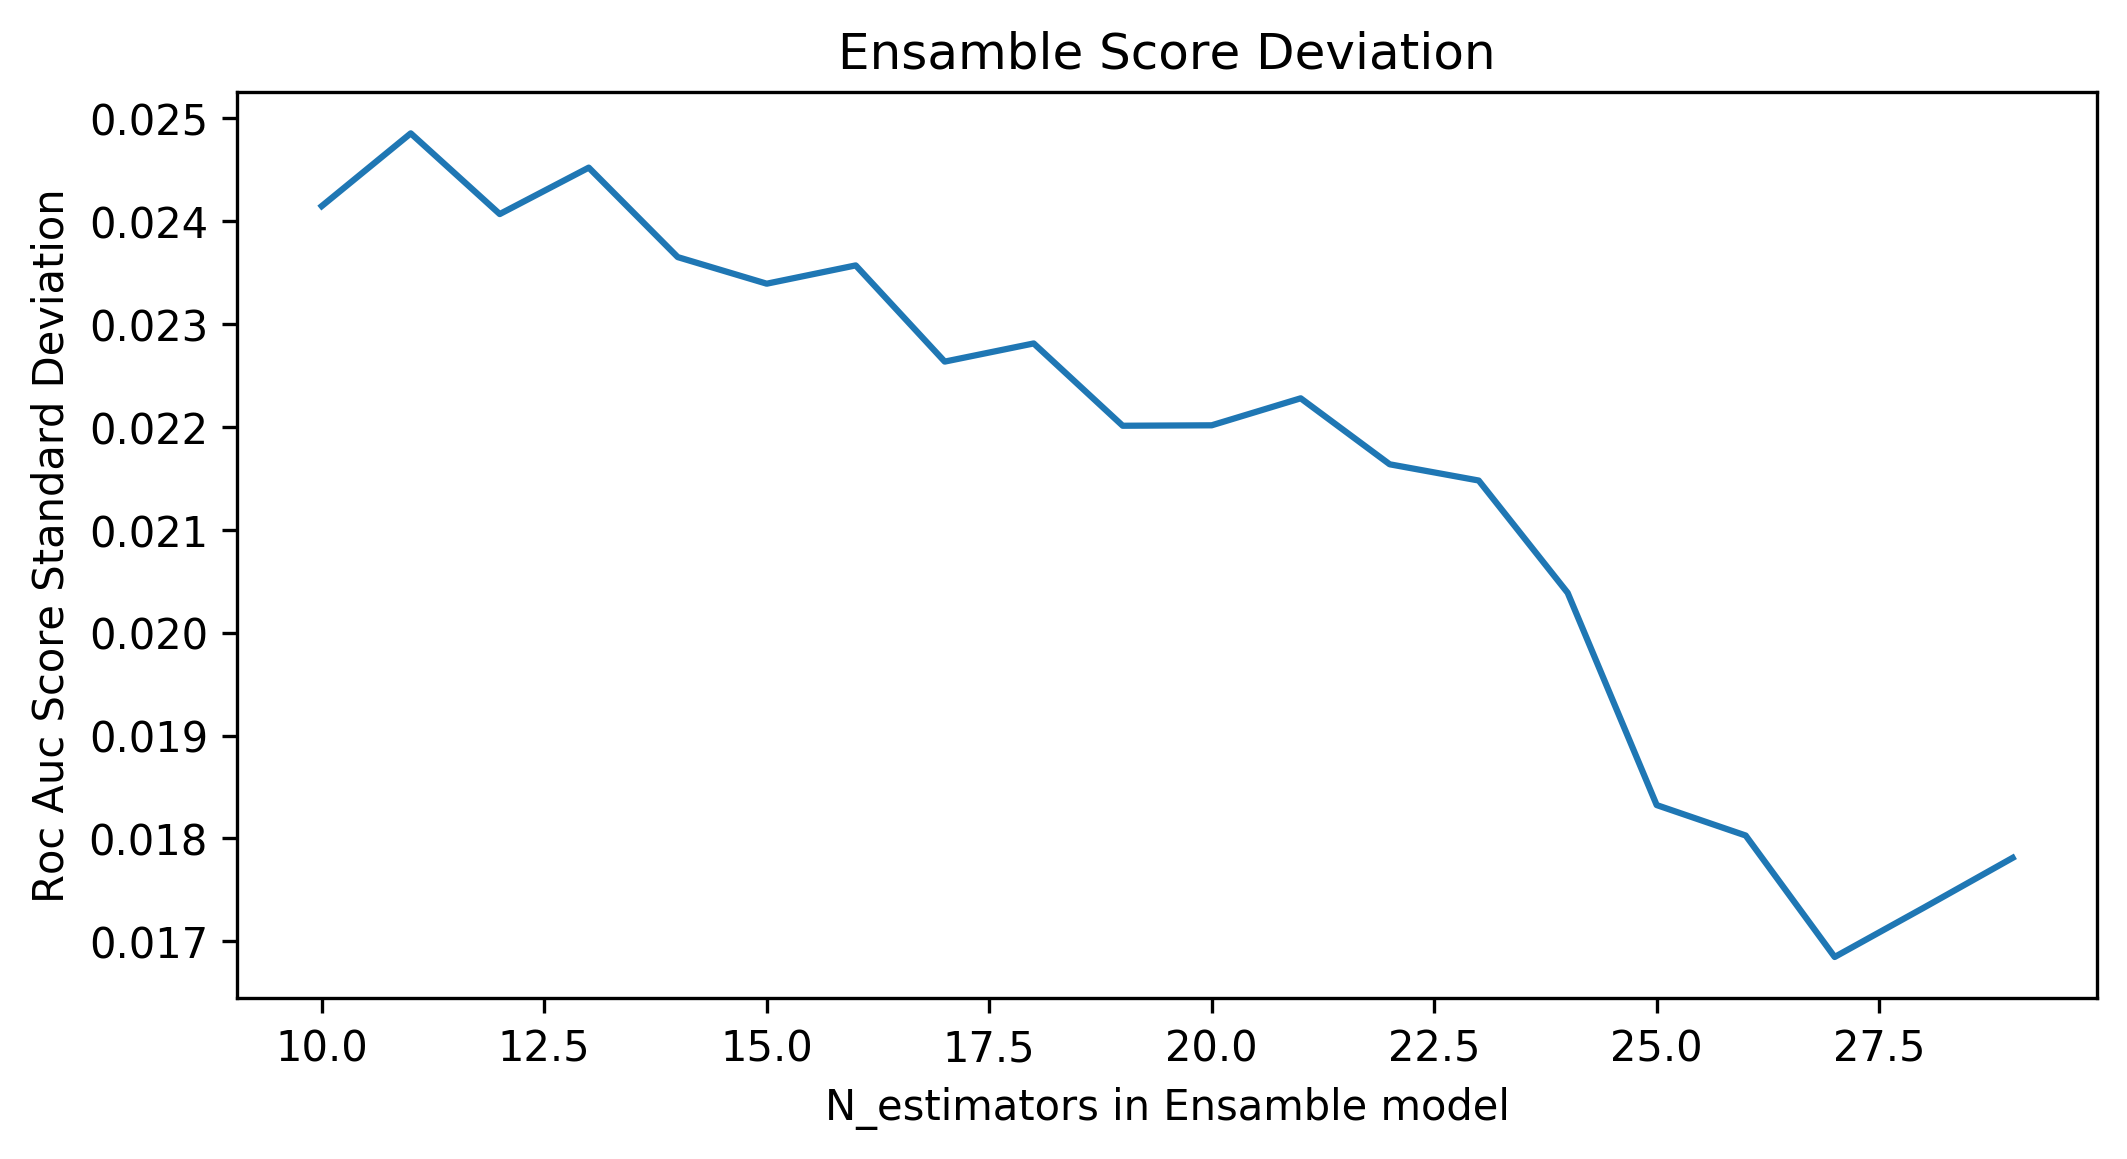

In [48]:
plt.figure(figsize=(8,4),dpi=300)
plt.plot(range(10,30),std_scoring[9:30])
plt.xlabel('N_estimators in Ensamble model')
plt.ylabel('Roc Auc Score Standard Deviation')
plt.title('Ensamble Score Deviation')
plt.show()

In [17]:
clf=DecisionTreeClassifier(random_state=42)
clf.fit(train_new,y_new)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [3]:
rd=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=300)
rd.fit(train_data,y)
columns=list(train)
fea_imp=pd.DataFrame({'features':columns,'Feature_importance':rd.feature_importances_})
fea_imp=fea_imp.sort_values('Feature_importance',ascending=False).reset_index(drop=True)
fea_imp.head(20)

,features,Feature_importance
0,NumberOfTimes90DaysLate,0.076754
1,NumberOfTime60-89DaysPastDueNotWorse,0.039350
2,NumberOfTime30-59DaysPastDueNotWorse,0.039042
3,NumberOfOpenCreditLinesAndLoans,0.033647
4,RevolvingUtilizationOfUnsecuredLines,0.031005
5,RevolvingUtilizationOfUnsecuredLines^2,0.030342
6,RevolvingUtilizationOfUnsecuredLines^2 age,0.030190
7,RevolvingUtilizationOfUnsecuredLines^3,0.030053
8,RevolvingUtilizationOfUnsecuredLines age,0.027394
9,MonthlyIncome age^2,0.026249


In [ ]:
fe_data=train[list(fea_imp.features)[:20]]
fe_data.to_csv('fe_data.csv')

fe=std_.fit_transform(fe_data)
lg=LogisticRegression(random_state=42,solver='newton-cg')
best_clf=GridSearchCV(lg,param_grid={'C':[0.001,0.01,0.1,1]},
                      n_jobs=-1,scoring='roc_auc')
best_clf.fit(fe,y)
print(best_clf.best_params_,best_clf.best_score_)

lg=LogisticRegression(random_state=42)
best_clf=GridSearchCV(lg,param_grid={'C':[0.001,0.01,0.1,1]},
                      n_jobs=-1,scoring='roc_auc')
best_clf.fit(train_data,y)
print(best_clf.best_params_,best_clf.best_score_)

lg=LogisticRegression(random_state=42)
train_size,train_score,test_score=learning_curve(lg,train_data,y,train_sizes=np.linspace(0.1,1,20),cv=5,
                                                scoring='roc_auc',n_jobs=-1)

plt.figure(dpi=300,figsize=(8,4))
plt.plot(train_size,np.mean(train_score,axis=1),color='blue',label='train score')
plt.plot(train_size,np.mean(test_score,axis=1),color='red',label='test score')
plt.legend()
plt.title('Learning Curve')

y_scores = cross_val_predict(lg, train_data, y, cv=3,
                             method="decision_function")
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper right", fontsize=16)
    plt.title('Precision and Recall curve under model Logistic Regression')
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4),dpi=300)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.ylim([0, 1])
plt.show()

In [ ]:
rd=RandomForestClassifier(random_state=42,n_estimators=300,n_jobs=-1)
y_scores = cross_val_predict(rd, train_data, y, cv=3,
                             method="predict")
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper right", fontsize=16)
    plt.title('Precision and Recall curve under model Random Forest')
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4),dpi=300)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.ylim([0, 1])
plt.show()

In [4]:
fe_data=pd.read_csv('fe_data.csv',index_col=False)
fe_train=fe_data.iloc[0:20000,1:]
fe_y=y[:20000]

In [5]:
fe_train['y']=fe_y
fe_train_pos=fe_train.loc[fe_train.y==1,]
fe_train_neg=fe_train.loc[fe_train.y==0,]
fe_train_pos=fe_train_pos.sample(6000,replace=True)
print(fe_train_pos.shape)
print(fe_train_neg.shape)

(6000, 21)
(18716, 21)


In [6]:
fe_train=pd.concat([fe_train_pos,fe_train_neg],axis=0)
print(fe_train.shape)
y=fe_train['y']
fe_train=fe_train.drop('y',axis=1)
print(fe_train.shape)
print(len(y))
std_=StandardScaler()
fe_train=std_.fit_transform(fe_train)

(24716, 21)
(24716, 20)
24716


In [16]:
clf=MLPClassifier(random_state=42)
par={'alpha':[0.001,0.01,0.1,1],'activation':['logistic','tanh','relu'],
    'solver':['lbfgs','adam'],'hidden_layer_sizes':[(50,20),(40,30),(100,)]}
best_clf=GridSearchCV(clf,cv=5,param_grid=par,n_jobs=-1,scoring='roc_auc')
best_clf.fit(fe_train,y)


/Users/zhangdi/ACT4311/act/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...e,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['

In [19]:
best_clf.best_estimator_

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [17]:
best_clf.best_score_

0.9261560358895009

In [18]:
np.mean(best_clf.cv_results_['mean_test_score'])

0.8832637962734484

In [20]:
clf=MLPClassifier(random_state=42,alpha=0.01,activation='tanh',
                  solver='lbfgs',max_iter=300,hidden_layer_sizes=(40,30))
clf.fit(fe_train,y)

/Users/zhangdi/ACT4311/act/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)